In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("counterfeit_products_renamed.csv")

In [3]:
df

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.29,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,NaN,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True
4997,bfae7e37,seller_8274,Luxury Goods,EliteDesign,293.09,4.6,7255,8,808,1,...,NaN,4289,344,51,3,18,False,False,NaN,False
4998,bc618758,seller_5933,Luxury Goods,EliteDesign,NaN,3.0,14,1,62,37,...,US,2981,155,79,1,0,False,False,NaN,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [5]:
df.shape

(5000, 27)

In [6]:
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


### Statistical Summary

In [7]:
df.describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


### Missing Values Analysis

In [8]:
# Checking missing values
mis=df.isnull().sum().reset_index()

In [9]:
mis

,index,0
0,item_ref,0
1,vendor_code,0
2,product_type,0
3,manufacturer,0
4,cost_usd,1348
5,vendor_score,0
6,feedback_count,0
7,image_qty,0
8,desc_chars,0
9,delivery_period,0


In [10]:
mis.columns = ['Column', 'Missing_Count']

In [11]:
mis

,Column,Missing_Count
0,item_ref,0
1,vendor_code,0
2,product_type,0
3,manufacturer,0
4,cost_usd,1348
5,vendor_score,0
6,feedback_count,0
7,image_qty,0
8,desc_chars,0
9,delivery_period,0


In [12]:
mis['Percentage']=(mis['Missing_Count']/5000)*100

In [13]:
mis

,Column,Missing_Count,Percentage
0,item_ref,0,0.00
1,vendor_code,0,0.00
2,product_type,0,0.00
3,manufacturer,0,0.00
4,cost_usd,1348,26.96
5,vendor_score,0,0.00
6,feedback_count,0,0.00
7,image_qty,0,0.00
8,desc_chars,0,0.00
9,delivery_period,0,0.00


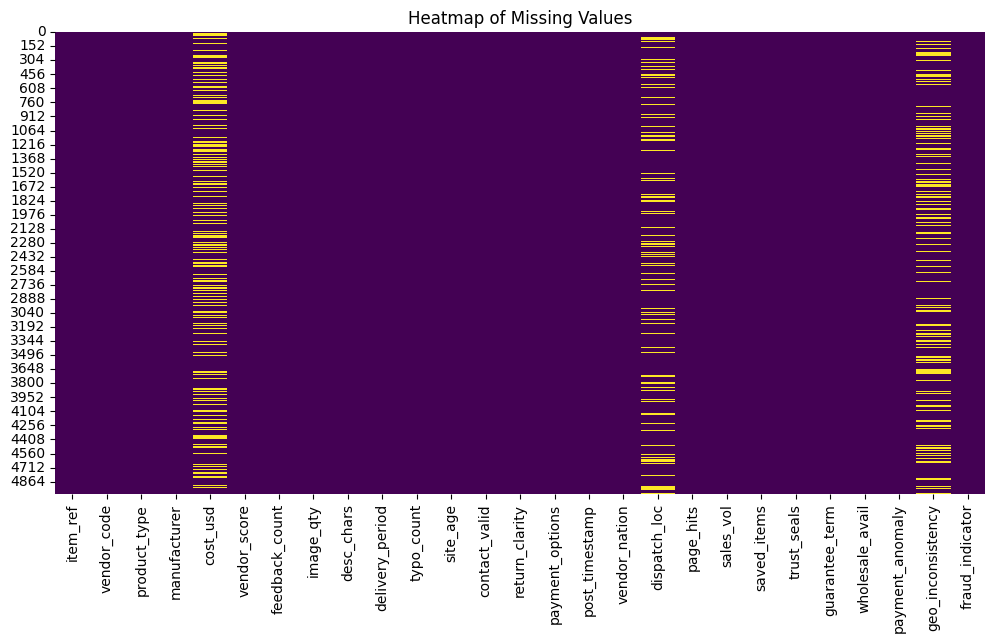

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [15]:
# Handling missing values
mean=np.mean(df['cost_usd'])
mean

np.float64(224.710643483023)

In [16]:
df['cost_usd']=df['cost_usd'].fillna(value=mean)

In [17]:
df

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.540000,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,224.710643,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.870000,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.270000,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.980000,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.290000,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,224.710643,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True
4997,bfae7e37,seller_8274,Luxury Goods,EliteDesign,293.090000,4.6,7255,8,808,1,...,NaN,4289,344,51,3,18,False,False,NaN,False
4998,bc618758,seller_5933,Luxury Goods,EliteDesign,224.710643,3.0,14,1,62,37,...,US,2981,155,79,1,0,False,False,NaN,True


In [18]:
df = df.dropna(subset=['dispatch_loc'])

In [19]:
df

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.540000,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,224.710643,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.870000,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.270000,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.980000,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,70f25860,seller_7320,Fashion,FashionForward,283.320000,4.1,8432,7,762,3,...,CA,4720,141,36,2,2,False,False,True,False
4994,4e682b84,seller_5022,Cosmetics,BeautyLux,149.930000,4.4,4680,4,909,4,...,CA,994,33,29,4,17,False,False,False,False
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.290000,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,224.710643,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True


In [20]:
df['geo_inconsistency']=df['geo_inconsistency'].fillna(value='Unknown')
#"Hey, are you sure you're changing the real DataFrame? Because this might just be a copy, and your changes might not stick."

C:\Users\hp\AppData\Local\Temp\ipykernel_8624\1291879516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geo_inconsistency']=df['geo_inconsistency'].fillna(value='Unknown')


In [21]:
df

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.540000,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,224.710643,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.870000,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.270000,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.980000,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,70f25860,seller_7320,Fashion,FashionForward,283.320000,4.1,8432,7,762,3,...,CA,4720,141,36,2,2,False,False,True,False
4994,4e682b84,seller_5022,Cosmetics,BeautyLux,149.930000,4.4,4680,4,909,4,...,CA,994,33,29,4,17,False,False,False,False
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.290000,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,Unknown,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,224.710643,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True


In [22]:
# Duplicate values
df.duplicated().sum() # There are no duplicate values here

np.int64(0)

<Axes: >

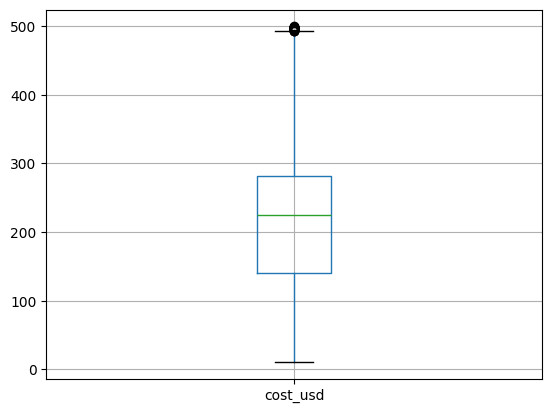

In [23]:
df.boxplot(column='cost_usd')

<Axes: >

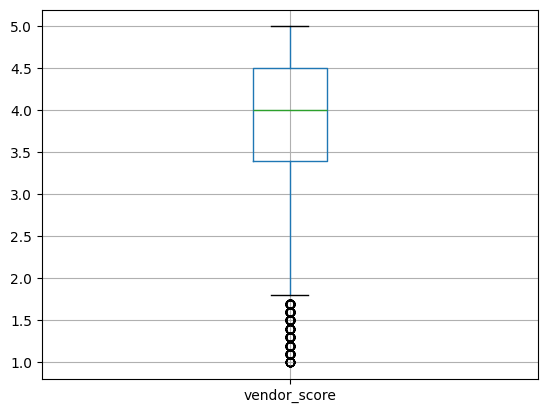

In [24]:
df.boxplot(column='vendor_score')

<Axes: >

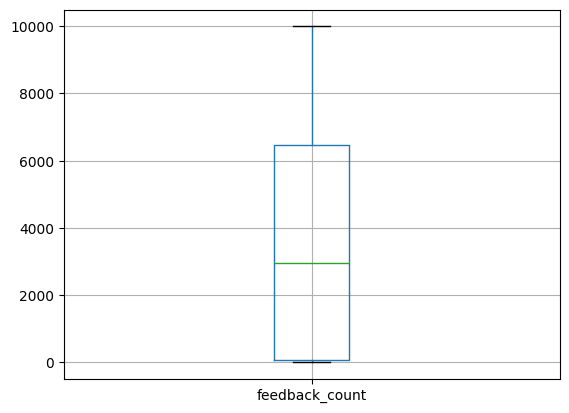

In [25]:
df.boxplot(column='feedback_count')

<Axes: >

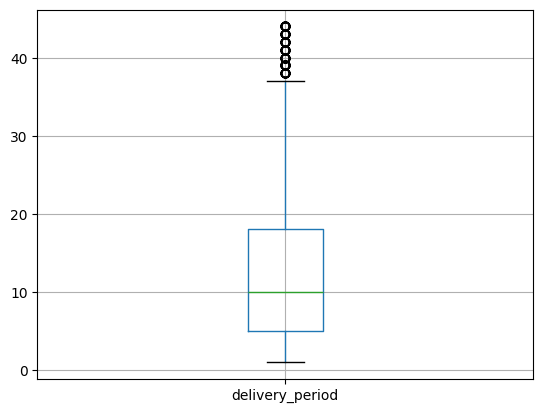

In [26]:
df.boxplot(column='delivery_period')

<Axes: >

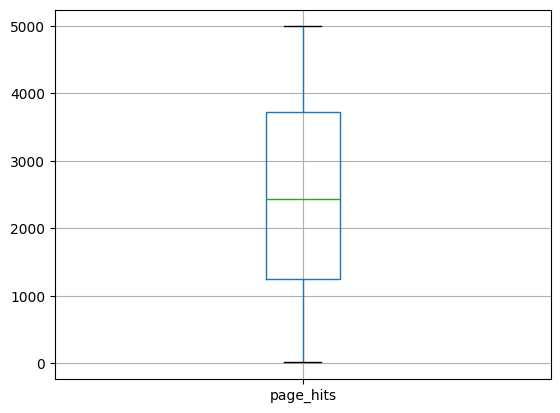

In [27]:
df.boxplot(column='page_hits')

<Axes: >

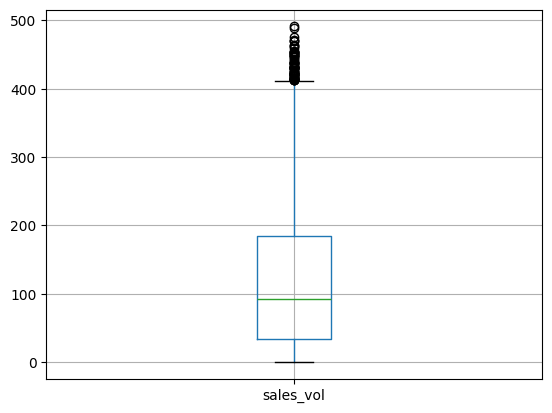

In [28]:
df.boxplot(column='sales_vol')

<Axes: >

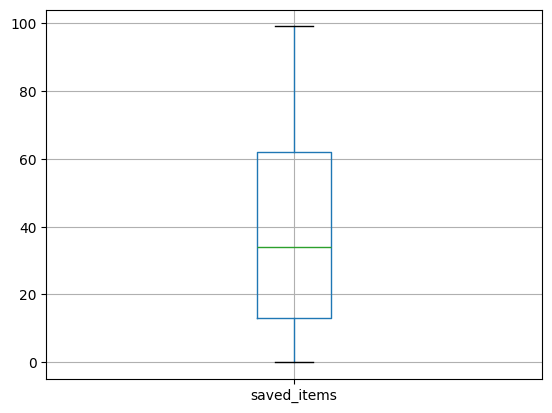

In [29]:
df.boxplot(column='saved_items')

In [30]:
# While some extreme values were observed in features like cost_usd,vendor_score,delivery_period and sales_vol these values are somewhat realistic and not impossible.
# Since such unusual values may capture genuine differences between counterfeit and genuine products,so I decided to retain them in the dataset for now.

### Data Distribution Analysis

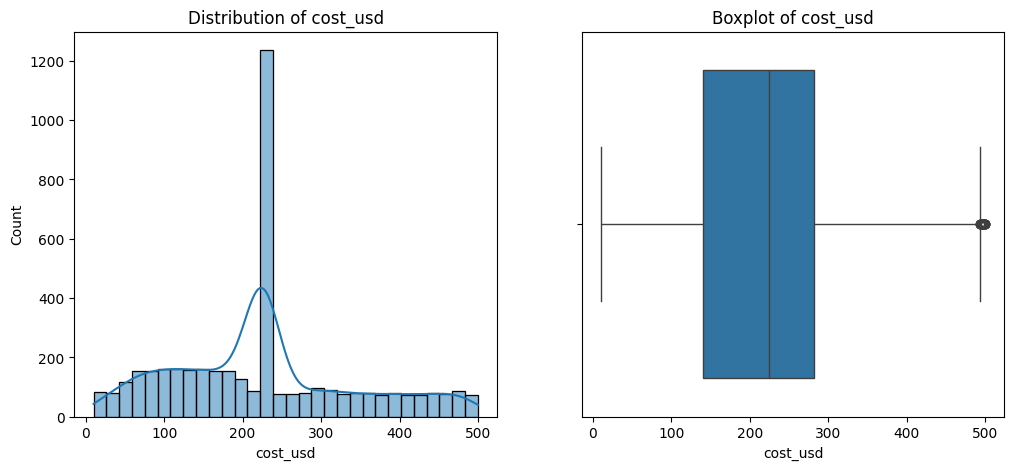

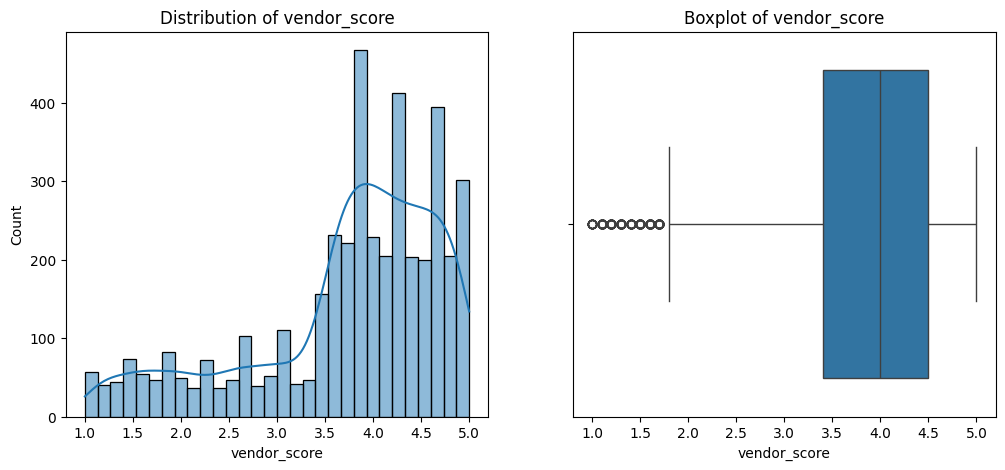

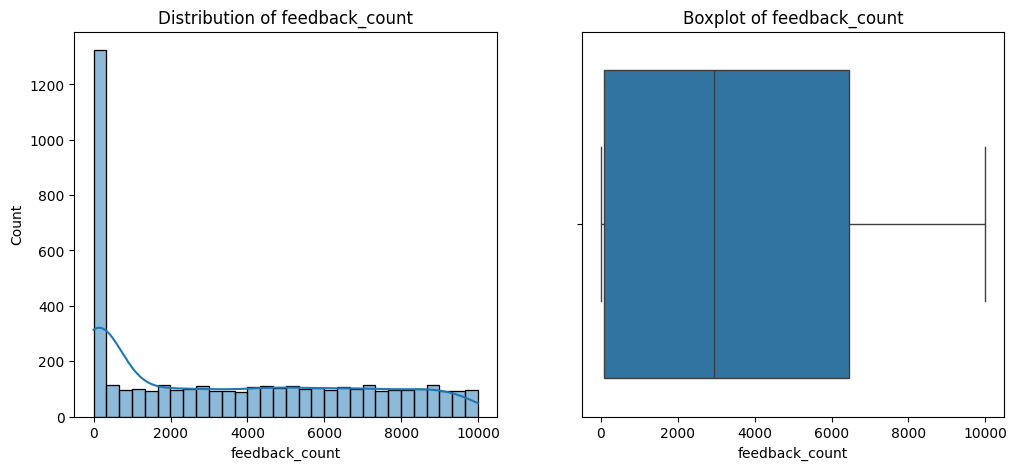

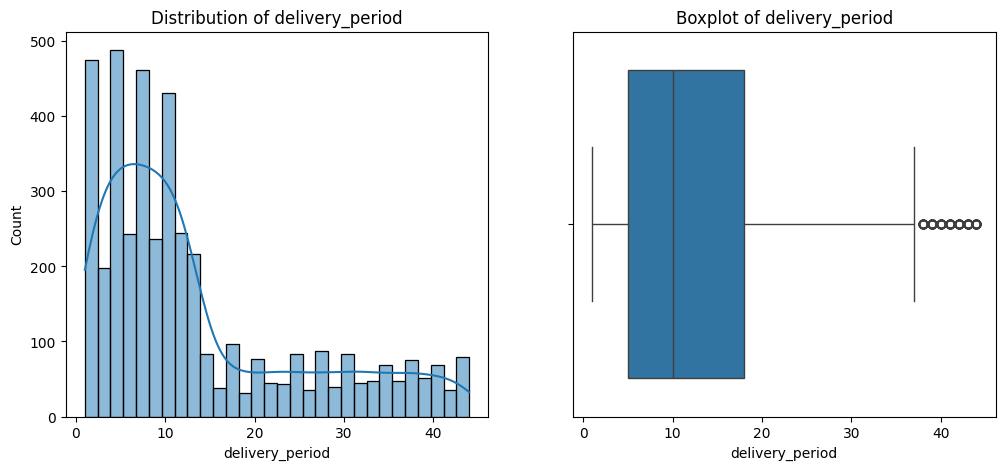

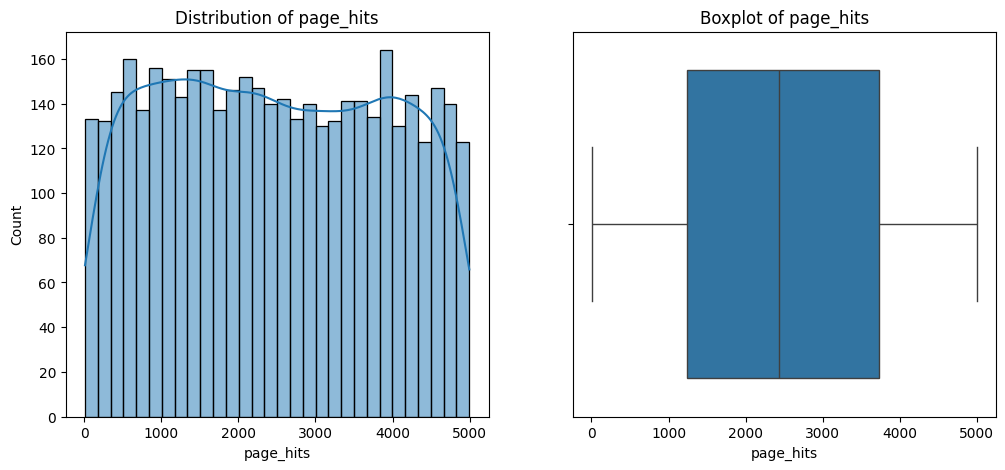

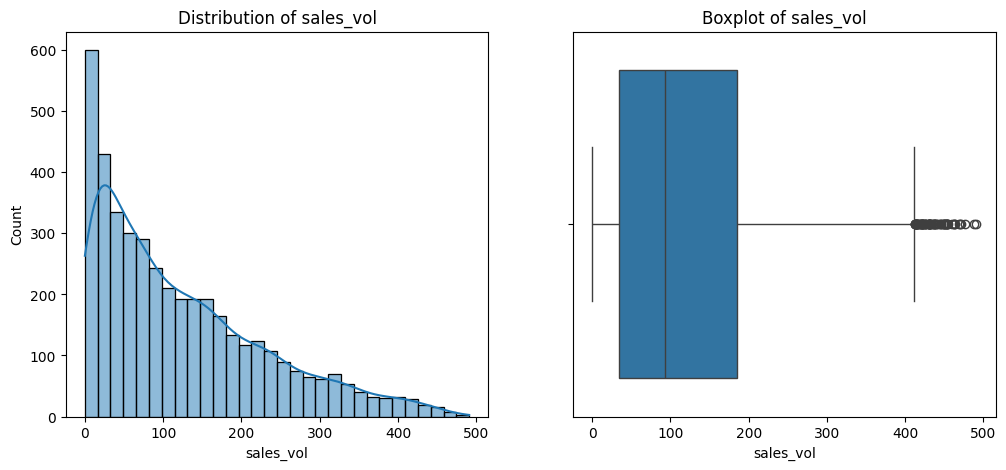

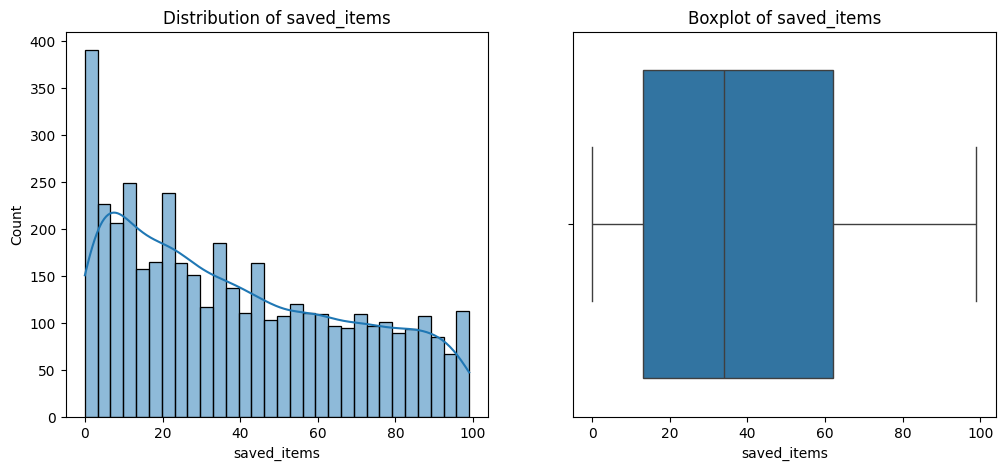

In [31]:
# Numerical Columns
numeric_cols = ['cost_usd','vendor_score','feedback_count','delivery_period','page_hits','sales_vol','saved_items']
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [32]:
# Distribution of cost_usd seems to be a normal distrbution
# We can see that for distribution of vendor_score as the vendor score increases there is a increase in the total count or the no.of people giving those ratings also the ratings of less than 2 are considered here as outliers showing people giving more higher vendor scores than lower vendor scores.
# The feedback_count variable is highly right-skewed. Most products have low feedback counts, while a small number of products receive very high feedback. These extreme values are valid and indicate popular products. This distribution suggests feedback count could be an important signal in detecting counterfeit products, as genuine items may attract more customer reviews.
# The delivery_period distribution is highly right skewed showing most products have a delivery period between 0-20 and delivery_period over 38 days are very rare and thus here are outliers.
# The distribution of page hits is approximately normal, with most products receiving a moderate number of hits. The box plot shows the median is slightly left of center, indicating a small negative skew in the data.
# The sales_vol variable is strongly right-skewed. Most products have very low sales, while only a small number of products achieve very high sales volumes. The boxplot shows many high-value outliers, which correspond to genuine popular products. This feature indicates a long-tail distribution typical in e-commerce and can serve as a strong differentiator between genuine and counterfeit products.
# The box plot shows that the median number of saved items is low, with the data heavily concentrated at the lower end. The wide box and the position of the median line confirm the right-skewed distribution, meaning most products have few saved items.

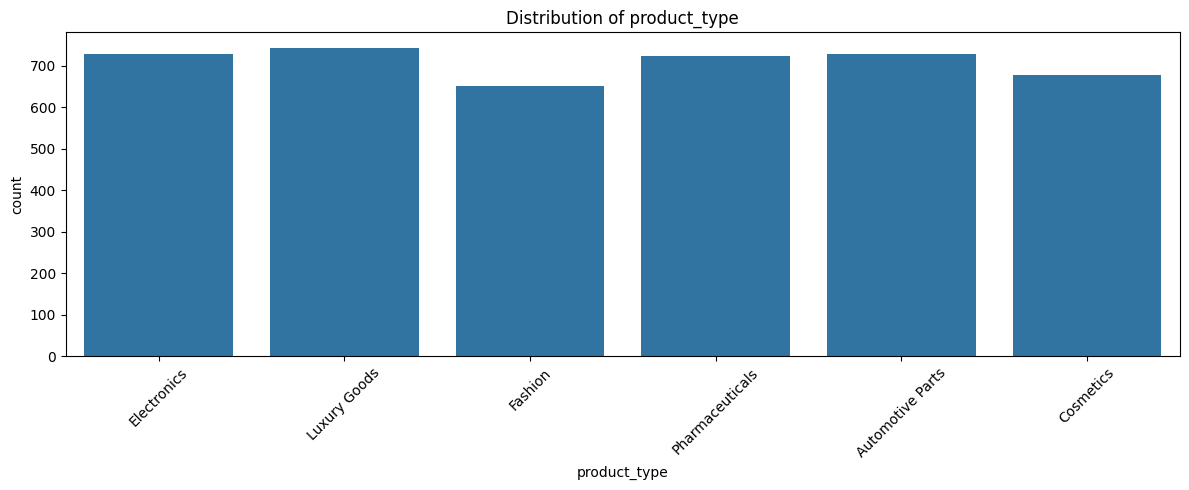

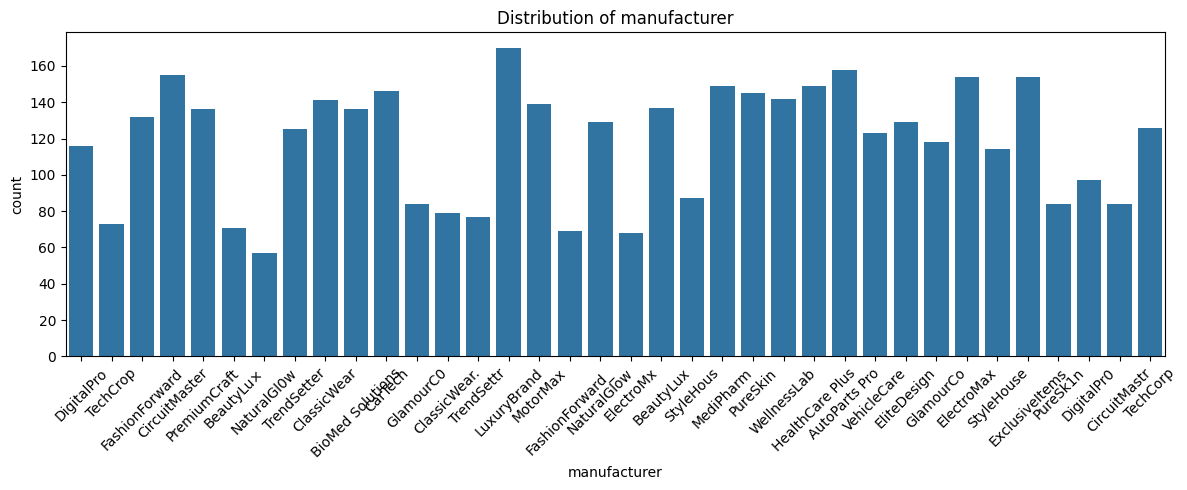

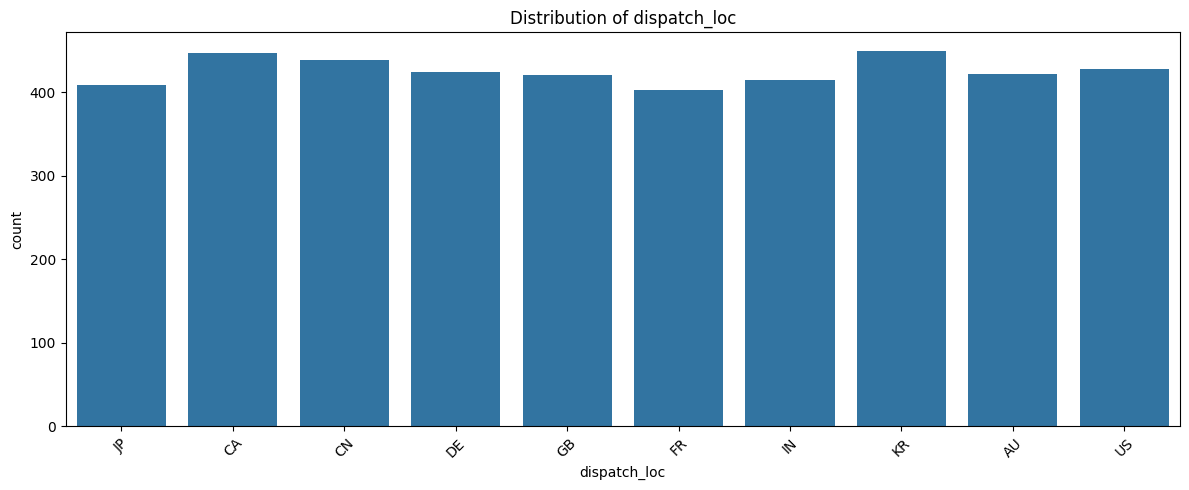

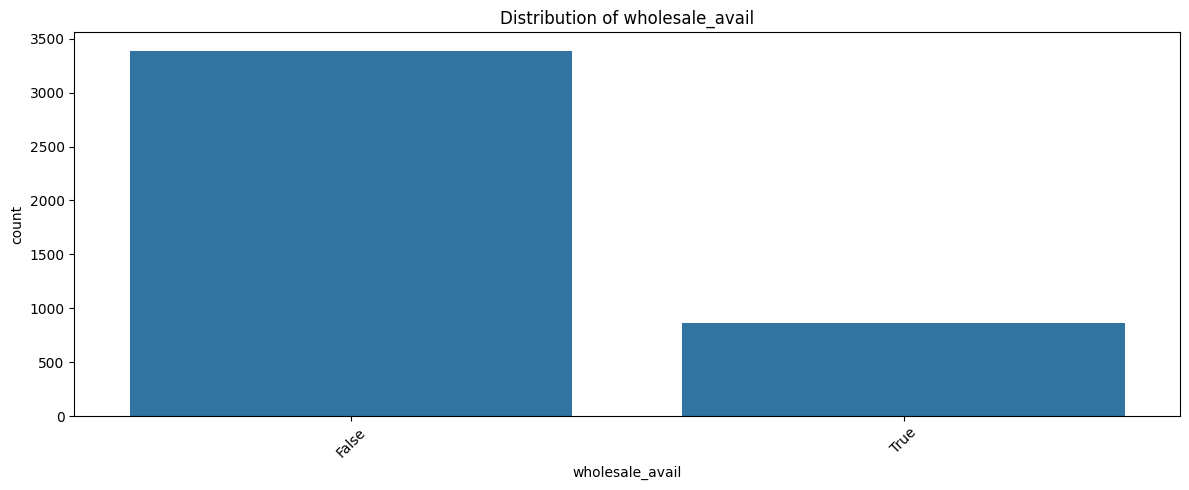

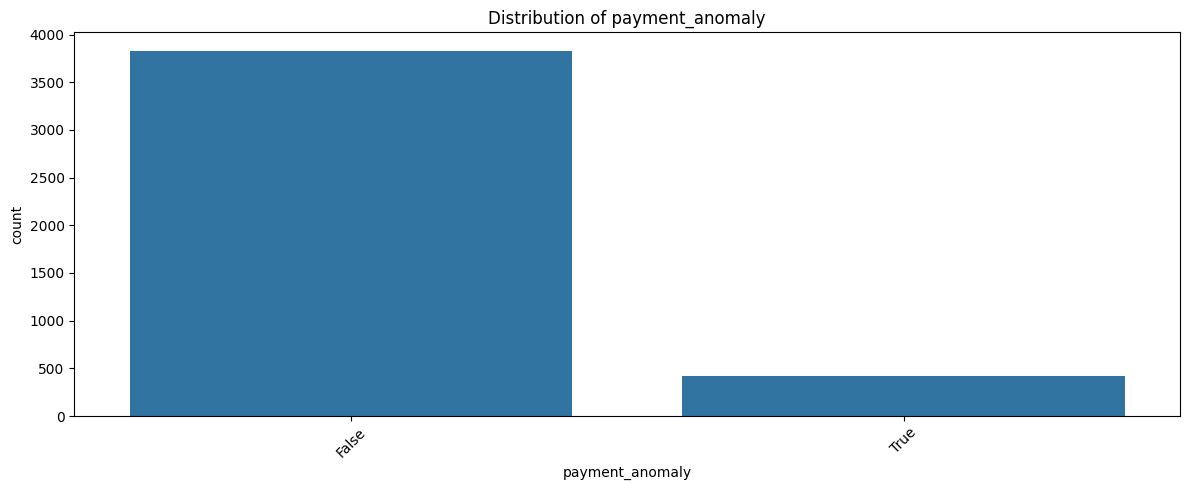

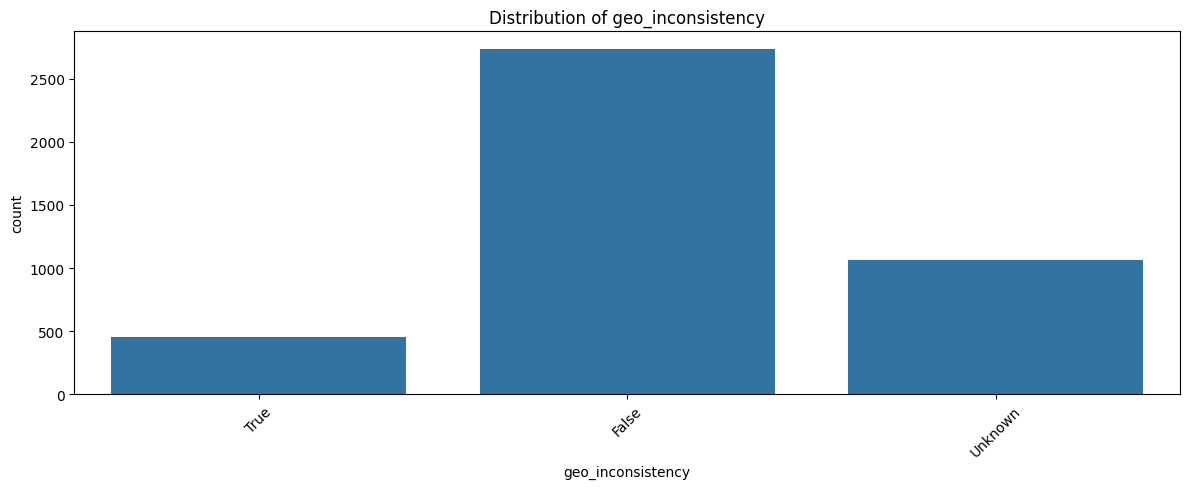

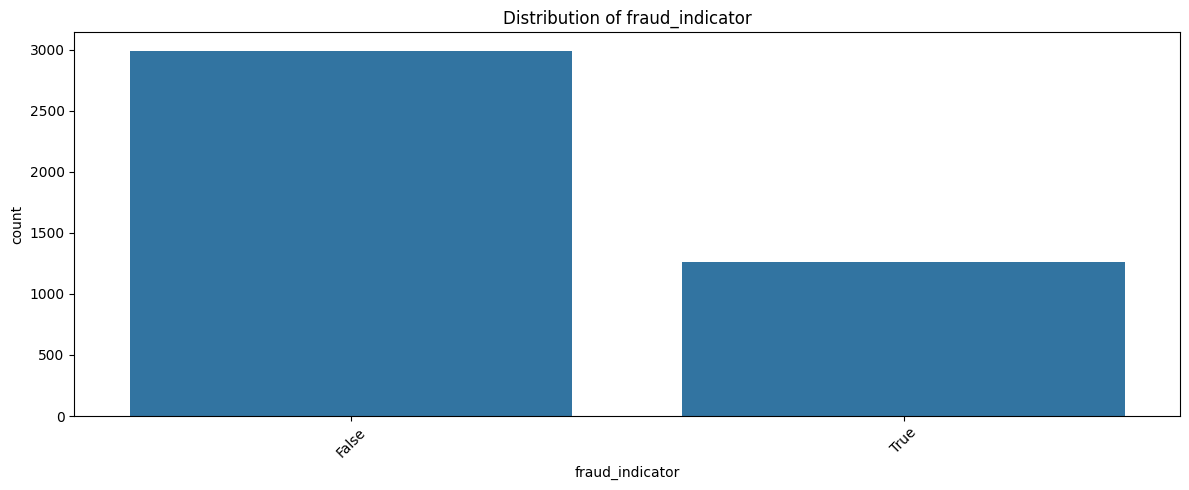

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_cols = ['product_type','manufacturer','dispatch_loc','wholesale_avail',
            'payment_anomaly','geo_inconsistency','fraud_indicator']
for col in cat_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

### Bivariate Analysis

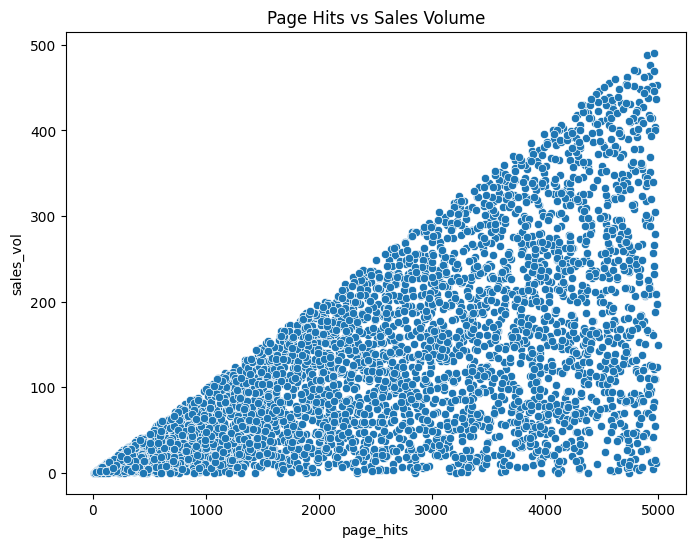

In [36]:
# Bivariate Analysis

# Numerical vs Target: Scatterplots
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['page_hits'], y=df['sales_vol'])
plt.title("Page Hits vs Sales Volume")
plt.show()

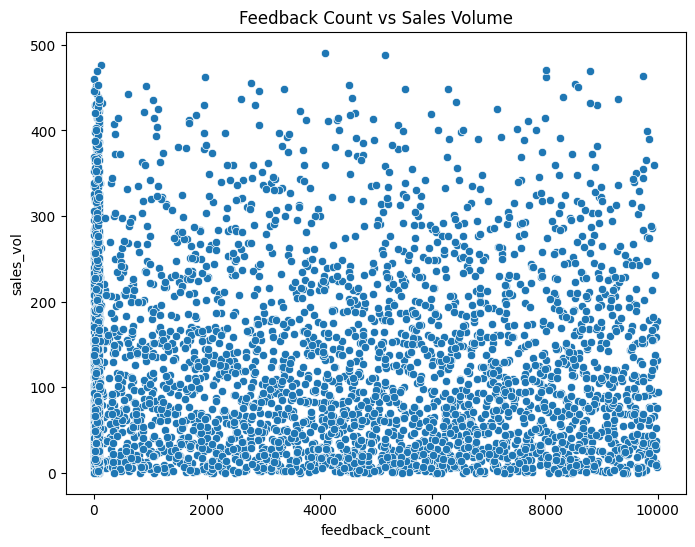

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['feedback_count'], y=df['sales_vol'])
plt.title("Feedback Count vs Sales Volume")
plt.show()

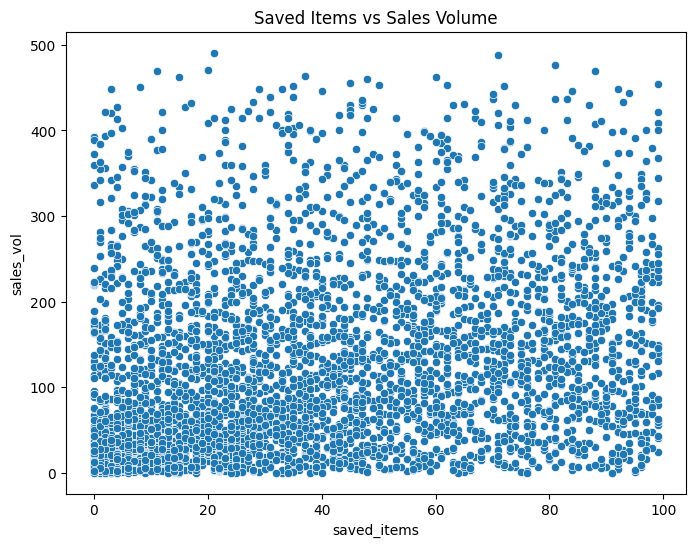

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['saved_items'], y=df['sales_vol'])
plt.title("Saved Items vs Sales Volume")
plt.show()

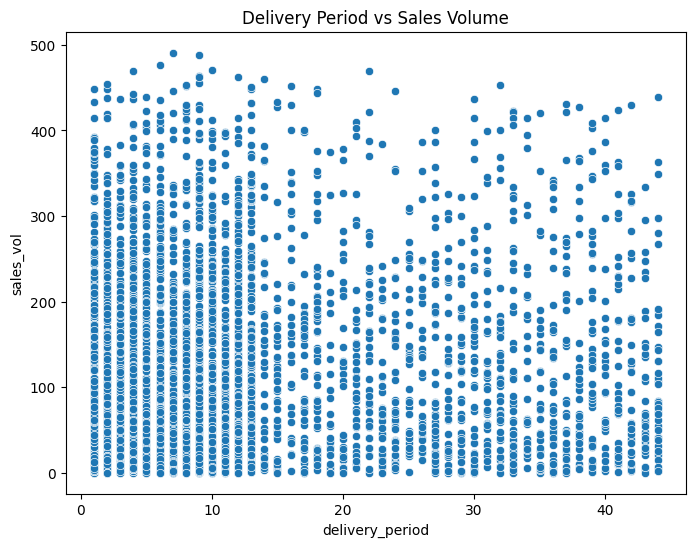

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['delivery_period'], y=df['sales_vol'])
plt.title("Delivery Period vs Sales Volume")
plt.show()

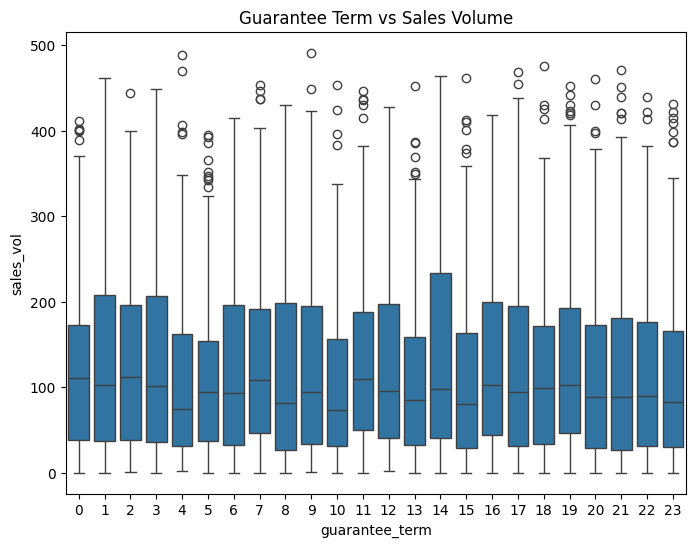

In [41]:
# Categorical vs Target: Boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x=df['guarantee_term'], y=df['sales_vol'])
plt.title("Guarantee Term vs Sales Volume")
plt.show()

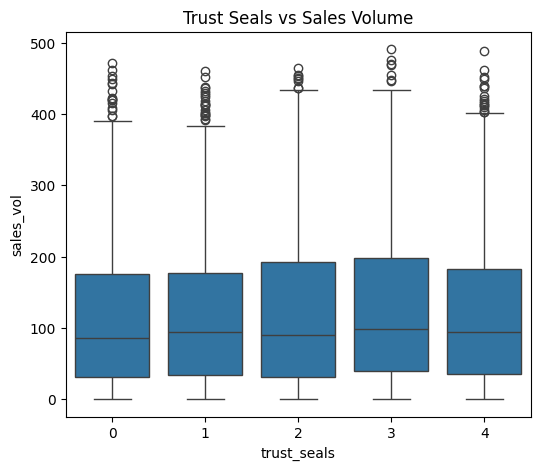

In [42]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['trust_seals'], y=df['sales_vol'])
plt.title("Trust Seals vs Sales Volume")
plt.show()

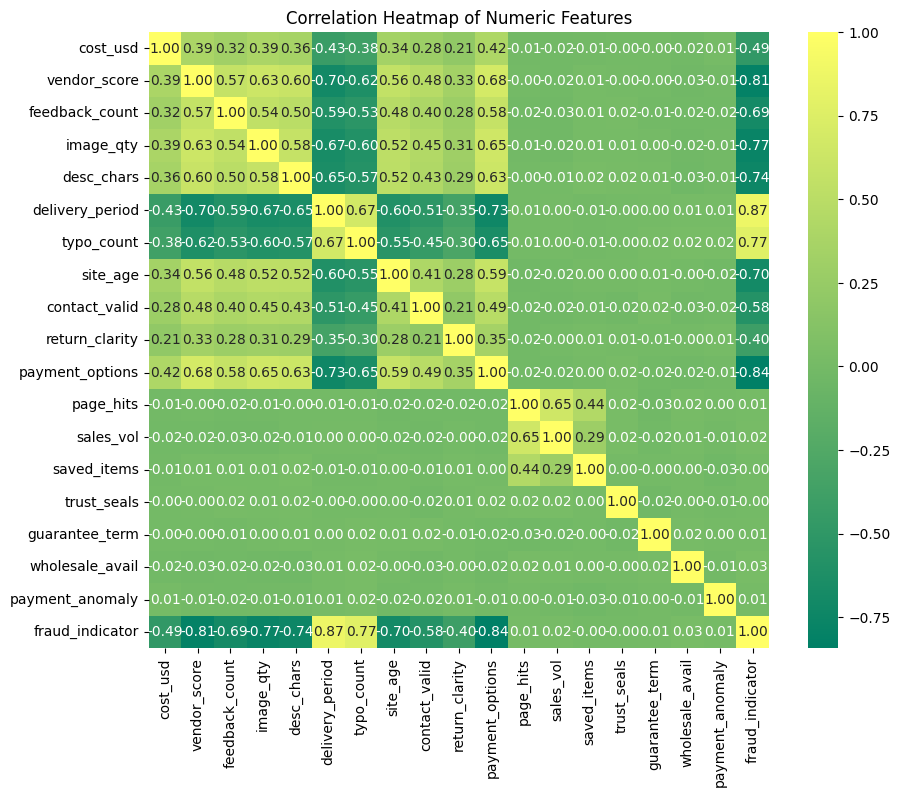

In [44]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="summer", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
"""
Scatterplots (Numerical vs Sales)

Page Hits vs Sales Vol - Positive trend → more page hits generally increase sales.
Feedback Count vs Sales Vol - Moderate upward trend → more feedback helps sales but with some noise.
Saved Items vs Sales Vol - Stronger relationship → items saved more often tend to sell more.
Delivery Period vs Sales Vol - Negative trend → longer delivery times reduce sales.

Boxplots (Categorical vs Sales)

Guarantee Term vs Sales Vol - Products with longer guarantees (e.g., 6–12 months) show higher average sales.
Trust Seals vs Sales Vol - Items with trust seals sell more consistently compared to those without.

Heatmap

Sales Volume is positively correlated with page hits, feedback count, and saved items.
Sales Volume is negatively correlated with delivery period (faster delivery = more sales).
Saved items and page hits are also positively correlated - indicates they move together.
"""

### Conclusions

In [ ]:
# 1. Trust seals & guarantee terms are the strongest indicators – counterfeit products usually miss these.
# 2. Delivery period is another red flag – longer and inconsistent shipping suggests counterfeit sellers.
# 3. Sales volume spikes & unusual feedback counts may indicate manipulated popularity for counterfeit items.
# 4. Customer behavior features (saved items, page hits) are not strong differentiators between genuine & counterfeit.